In [22]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

/home/vinicius/.local/lib/python3.10/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.stats import gaussian_kde


# Preparando dados

In [1]:
DATA_PATH = "./data"
FILE_NAME = "stackoverflow.csv"

In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(f"{DATA_PATH}/{FILE_NAME}")
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [5]:
# from math import isnan

TOP10_COUNTRIES = ["United States of America", "Germany" ,"India" ,"United Kingdom of Great Britain and Northern Ireland" ,"Canada" ,"France" ,"Poland", "Netherlands", "Australia", "Brazil"]
PODER_DE_COMPRA_CONVERSAO = {
"United States of America": (1, 139.7),
"Germany": (0.7,  131.9),
"India": (20.22, 216.9),
"United Kingdom of Great Britain and Northern Ireland": (0.67, 142.7),
"Canada": (1.17, 134.9),
"France": (0.67, 124),
"Poland": (1.88, 158.2),
"Netherlands": (0.74, 137.7),
"Australia": (1.39, 139.9),
"Brazil" :(2.44, 213.9)
}

def obtem_poder_de_compra(row):
    vars = PODER_DE_COMPRA_CONVERSAO[row["Country"]]
    return (row["ConvertedCompYearly"] * vars[1]) / (vars[0] * 100)

def concatena_stacks(row):
    lang = row["LanguageHaveWorkedWith"]
    db = row["DatabaseHaveWorkedWith"]
    platform = row["PlatformHaveWorkedWith"]
    misc = row["MiscTechHaveWorkedWith"]
    
    languages = np.char.split("" if pd.isnull(lang) else lang, sep=';').tolist()
    dbs = np.char.split("" if pd.isnull(db) else db, sep=';').tolist()
    platforms = np.char.split("" if pd.isnull(platform) else platform, sep=';').tolist()
    miscs = np.char.split("" if pd.isnull(misc) else misc, sep=';').tolist()
    
    concatenated = languages + dbs + platforms + miscs
    filtered = filter(lambda item: item != "", concatenated)

    return list(filtered)

# 
top10_df = df[df["Country"].isin(TOP10_COUNTRIES)]
top10_df = top10_df[["Country", "LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith", "MiscTechHaveWorkedWith", "ConvertedCompYearly"]]
top10_df = top10_df.dropna(subset=["ConvertedCompYearly"])
top10_df["poder_de_compra"] = top10_df.apply(obtem_poder_de_compra,axis=1)
top10_df["stacks"] = top10_df.apply(concatena_stacks, axis=1)
top10_df[["poder_de_compra", "stacks"]]

,poder_de_compra,stacks
1,398145.000000,"[HTML/CSS, JavaScript, Python, Supabase, Amazo..."
2,349250.000000,"[Bash/Shell (all shells), Go, Amazon Web Servi..."
3,217932.000000,"[Bash/Shell (all shells), HTML/CSS, JavaScript..."
5,206229.188060,"[Bash/Shell (all shells), HTML/CSS, JavaScript..."
6,188595.000000,"[Ada, Clojure, Elixir, Go, HTML/CSS, Java, Jav..."
...,...,...
89156,272415.000000,"[Bash/Shell (all shells), C, C++, JavaScript, ..."
89157,368624.050427,"[Java, Kotlin, SQLite, Firebase, Flutter]"
89162,44462.270902,"[C, C++, Microsoft SQL Server, SQLite]"
89167,1689.717507,"[Dart, HTML/CSS, JavaScript, TypeScript, Mongo..."


# Frequent Pattern

In [5]:
def isthereempty(stack):
    return stack == ""

# top10_df["stacks"].filter(lambda stacks: len(filter(isthereempty, stacks)) != 0, axis=1)
filtered_df = top10_df[top10_df['stacks'].apply(lambda stacks: any(isthereempty(stack) for stack in stacks))]
filtered_df

,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ConvertedCompYearly,poder_de_compra,stacks


<AxesSubplot:>

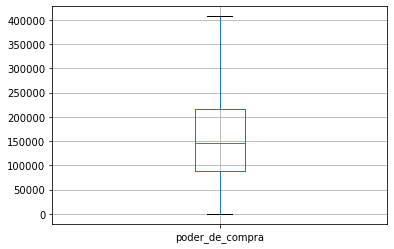

In [6]:
top10_df.boxplot(column="poder_de_compra", showfliers=False)

In [7]:
threshold_25 = top10_df["poder_de_compra"].quantile(0.25)
threshold_50 = top10_df["poder_de_compra"].quantile(0.5)
threshold_75 = top10_df["poder_de_compra"].quantile(0.75)
threshold_25, threshold_50, threshold_75

(89187.46268656716, 145417.6895522388, 216535.0)

In [8]:
df_25 = top10_df[top10_df["poder_de_compra"] <= threshold_25]
df_50 = top10_df[(top10_df["poder_de_compra"] > threshold_25) & (top10_df["poder_de_compra"] <= threshold_50)]
df_75 = top10_df[(top10_df["poder_de_compra"] > threshold_50) & (top10_df["poder_de_compra"] <= threshold_75)]
df_100 = top10_df[top10_df["poder_de_compra"] > threshold_75]
df_list = {"25":df_25,"50":df_50,"75": df_75, "100": df_100}

#### Registrando

In [9]:
# unique_elements =  np.unique(top10_df["stacks"])
unique_elements  = top10_df["stacks"].explode().unique()
unique_elements.shape

(143,)

In [10]:
STACKS_LEN = unique_elements.shape[0]

final_map = {}
size = 1

for i in range(STACKS_LEN):
    final_map[unique_elements[i]] = size
    size += 1

final_map

{'HTML/CSS': 1,
 'JavaScript': 2,
 'Python': 3,
 'Supabase': 4,
 'Amazon Web Services (AWS)': 5,
 'Netlify': 6,
 'Vercel': 7,
 'Electron': 8,
 'React Native': 9,
 'Tauri': 10,
 'Bash/Shell (all shells)': 11,
 'Go': 12,
 'Google Cloud': 13,
 'OpenStack': 14,
 'VMware': 15,
 'Vultr': 16,
 'PHP': 17,
 'Ruby': 18,
 'SQL': 19,
 'TypeScript': 20,
 'PostgreSQL': 21,
 'Redis': 22,
 'Cloudflare': 23,
 'Heroku': 24,
 'BigQuery': 25,
 'Cloud Firestore': 26,
 'Ada': 27,
 'Clojure': 28,
 'Elixir': 29,
 'Java': 30,
 'Lisp': 31,
 'OCaml': 32,
 'Raku': 33,
 'Scala': 34,
 'Swift': 35,
 'Zig': 36,
 'MariaDB': 37,
 'Microsoft SQL Server': 38,
 'MySQL': 39,
 'SQLite': 40,
 'Digital Ocean': 41,
 'RabbitMQ': 42,
 'Spring Framework': 43,
 'Rust': 44,
 'Dynamodb': 45,
 'MongoDB': 46,
 'Fly.io': 47,
 'NumPy': 48,
 'Pandas': 49,
 'Scikit-Learn': 50,
 'TensorFlow': 51,
 'C#': 52,
 'Kotlin': 53,
 'PowerShell': 54,
 'Cosmos DB': 55,
 'Microsoft Azure': 56,
 '.NET (5+) ': 57,
 'Solidity': 58,
 'Elasticsearch': 59,


In [11]:
OUTPUT_PATH = "./out/stackoverflow"
FILE_NAME = "stacks"

In [13]:
import subprocess

for quartile, df in df_list.items():
    casted_file = f"{OUTPUT_PATH}/{FILE_NAME}_{quartile}.txt"
    with open(casted_file, 'w') as file:
        file.write("@CONVERTED_FROM_TEXT\n")
        # Header
        for (key, item) in final_map.items():
            file.write(f"@ITEM={item}={key},\n")
        # Sequences
        for row in df.itertuples():
            casted_items = map(lambda x: str(final_map[x]), row.stacks)
            file.write(f"{' '.join(casted_items)}\n")
    
        subprocess.run(["java", "-jar", "./HighUtilityItemsetMining/spmf.jar", "run", "FPGrowth_itemsets", f"{casted_file}",  f"{OUTPUT_PATH}/output_{quartile}.txt","20%"])

>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 7399
 Max memory usage: 13.266372680664062 mb 
 Frequent itemsets count : 50
 Total time ~ 161 ms
Post-processing to show result in terms of string values.
Post-processing completed.
>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 7560
 Max memory usage: 12.695526123046875 mb 
 Frequent itemsets count : 52
 Total time ~ 179 ms
Post-processing to show result in terms of string values.
Post-processing completed.
>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 7411
 Max memory usage: 12.9423828125 mb 
 Frequent itemsets count : 58
 Total time ~ 160 ms
Post-processing to show result in terms of string values.
Post-processing completed.


# Subgroup Discovery

In [6]:
df.sample(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
47460,47461,I agree,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Profe...,Some college/university study without earning ...,Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Udemy;Pluralsight,5,1,"Developer, back-end",10 to 19 employees,I have some influence,Given a list,NaN,Ukraine,UAH\tUkrainian hryvnia,444000.0,Clojure;Go;Rust,Assembly;Clojure;Go;Julia;Rust,PostgreSQL;Redis,PostgreSQL;Redis,Amazon Web Services (AWS);Cloudflare;Vultr,Amazon Web Services (AWS);Vultr,NaN,NaN,NaN,NaN,Cargo;Docker,Cargo;Docker,Visual Studio Code,Visual Studio Code,Ubuntu;Windows;Windows Subsystem for Linux (WSL),Ubuntu;Windows Subsystem for Linux (WSL),NaN,NaN,Telegram,Telegram,ChatGPT;You.com,ChatGPT,AWS CodeWhisperer,NaN,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,I have never participated in Q&A on Stack Over...,"No, not really",Question/Answer shortening to present a more c...,Yes,Favorable,Increase productivity;Greater efficiency;Speed...,Highly distrust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 times a week,1-2 times a week,NaN,60-120 minutes a day,Less than 15 minutes a day,DevOps function;Microservices;Continuous integ...,Financial Services,Too long,Difficult,12041.0
61954,61955,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Hobby;Bootstrapping a business;Professional de...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other;Codecademy;Udemy;Coursera,11,9,"Developer, front-end",100 to 499 employees,I have some influence,Investigate,Start a free trial;Ask developers I know/work ...,Albania,ALL\tAlbanian lek,7072000.0,Go;HTML/CSS;Java;JavaScript;Python;SQL;Swift;T...,C++;Dart;Go;JavaScript;Python;SQL;TypeScript,Cloud Firestore;Firebase Realtime Database;Mon...,Elasticsearch;Firebase Realtime Database;Mongo...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Cloudflare;Digital O...,AngularJS;Django;Express;Flask;Gatsby;jQuery;N...,Express;FastAPI;Next.js;Node.js;React;Vue.js,Cordova;Electron;Hugging Face Transformers;Rea...,CUDA;Electron;Flutter;Hugging Face Transformer...,Gradle;npm;NuGet;Pip;pnpm;Unreal Engine;Vite;W...,Pip;pnpm;Terraform;Unreal Engine;Vite;Yarn,Android Studio;Goland;Nano;Visual Studio;Visua...,Goland;Nano;Vim;Visual Studio Code;WebStorm,MacOS;Windows

In [7]:
dev_df = df[["DevType"]]
dev_df = dev_df.dropna()
dev_df.sample(10)

,DevType
79280,"Developer, back-end"
38450,"Developer, back-end"
1511,"Developer, front-end"
41625,"Developer, full-stack"
34902,"Developer, back-end"
4868,"Developer, full-stack"
88571,"Developer, back-end"
16547,"Developer, desktop or enterprise applications"
37636,"Developer, full-stack"
39305,Research & Development role


In [8]:
def get_raw_dev_type(row):
    raw = row["DevType"]
    return raw.replace('Developer, ', '')

type_df = dev_df[dev_df["DevType"].str.startswith("Developer")]
type_df = type_df.apply(get_raw_dev_type, axis=1)
type_df.unique(), type_df.unique().__len__()

(array(['back-end', 'front-end', 'full-stack',
        'desktop or enterprise applications', 'QA or test', 'mobile',
        'embedded applications or devices', 'game or graphics',
        'Developer Experience', 'Developer Advocate'], dtype=object),
 10)

In [11]:
DEV_TYPE_BLACK_LIST = ["Student", "Designer"]

def cast_dev_type(row):
    _type = row["DevType"]
    if _type.startswith("Developer"):
        return get_raw_dev_type(row)
    if  _type == "Engineer, data":
        return "data-engineer"
    _type = _type.replace(' ', '-')
    _type = _type.replace(',', '')
    return _type

type10_df = df[df["Country"].isin(TOP10_COUNTRIES)]
type10_df = type10_df.dropna(subset=["ConvertedCompYearly", "DevType"])
type10_df["poder_de_compra"] = type10_df.apply(obtem_poder_de_compra,axis=1)
type10_df = type10_df[["poder_de_compra", "DevType"]]
type10_df["FinalDevType"] = type10_df.apply(cast_dev_type, axis=1)
type10_df = type10_df[~type10_df["FinalDevType"].isin(DEV_TYPE_BLACK_LIST)]
type10_df = type10_df[["poder_de_compra", "FinalDevType"]]
type10_df["FinalDevType"].unique(), type10_df["FinalDevType"].shape

(array(['Senior-Executive-(C-Suite-VP-etc.)', 'back-end', 'front-end',
        'full-stack', 'QA or test',
        'Data-scientist-or-machine-learning-specialist',
        'Data-or-business-analyst', 'Security-professional',
        'Research-&-Development-role', 'System-administrator',
        'Database-administrator', 'desktop or enterprise applications',
        'data-engineer', 'Cloud-infrastructure-engineer',
        'embedded applications or devices', 'Engineering-manager',
        'Other-(please-specify):', 'mobile', 'Academic-researcher',
        'DevOps-specialist', 'Blockchain', 'Developer Experience',
        'game or graphics', 'Developer Advocate', 'Project-manager',
        'Engineer-site-reliability', 'Hardware-Engineer',
        'Product-manager', 'Educator', 'Scientist',
        'Marketing-or-sales-professional'], dtype=object),
 (30120,))

In [12]:
TYPE_OUTPUT_PATH = "./out/type.csv"

type10_df.to_csv(TYPE_OUTPUT_PATH, index=False)

In [49]:
type10_df[type10_df["poder_de_compra"] < 500000]

,poder_de_compra,FinalDevType
1,398145.000000,Senior-Executive-(C-Suite-VP-etc.)
2,349250.000000,back-end
3,217932.000000,front-end
5,206229.188060,back-end
6,188595.000000,full-stack
...,...,...
89156,272415.000000,Engineering-manager
89157,368624.050427,mobile
89162,44462.270902,back-end
89167,1689.717507,mobile


In [37]:
def plot_density_type(type, in_df):
    aaa_df = in_df[in_df["FinalDevType"] == type]
    sns.kdeplot(aaa_df["poder_de_compra"], shade=True)
    
def plot_log_density_type(type, in_df):
    aaa_df = in_df[in_df["FinalDevType"] == type]
    ax = sns.kdeplot(aaa_df["poder_de_compra"], shade=True)
    # Set y-axis to logarithmic scale
    ax.set_yscale('log')

    # Add labels and title
    plt.xlabel('Poder de Compra')
    plt.ylabel('Density (log scale)')
    plt.title('Density Plot of Poder de Compra with Logarithmic Scale on Y-axis')

    # Show the plot
    plt.show()

/tmp/ipykernel_2478/1800307463.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(type10_df["poder_de_compra"], shade=True)


<AxesSubplot:xlabel='poder_de_compra', ylabel='Density'>

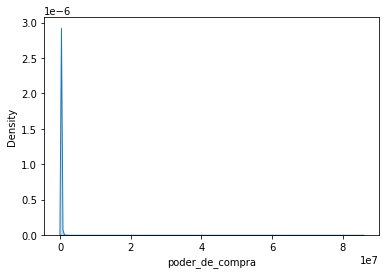

In [38]:
sns.kdeplot(type10_df["poder_de_compra"], shade=True)

/tmp/ipykernel_2478/2773101024.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(type10_df["poder_de_compra"], shade=True)


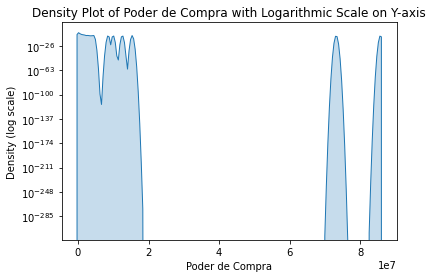

In [30]:
ax = sns.kdeplot(type10_df["poder_de_compra"], shade=True)
 # Set y-axis to logarithmic scale
ax.set_yscale('log')

# Add labels and title
plt.xlabel('Poder de Compra')
plt.ylabel('Density (log scale)')
plt.title('Density Plot of Poder de Compra with Logarithmic Scale on Y-axis')

# Show the plot
plt.show()

/tmp/ipykernel_2478/230169858.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


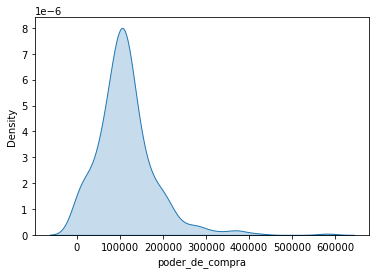

In [35]:
plot_density_type("Academic-researcher", type10_df)

/tmp/ipykernel_2478/3541173781.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


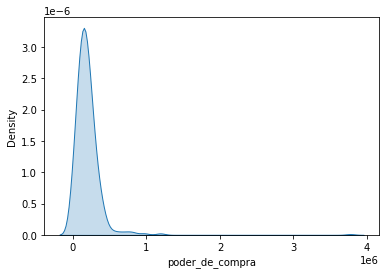

In [41]:
plot_density_type("Research-&-Development-role", type10_df)

/tmp/ipykernel_2478/3541173781.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


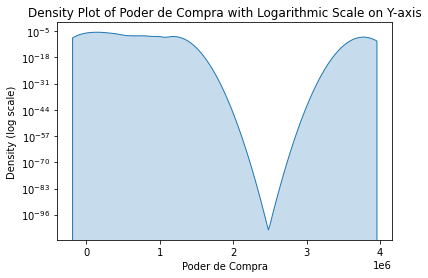

In [40]:
plot_log_density_type("Research-&-Development-role", type10_df)

In [43]:
type10_df[type10_df["poder_de_compra"] >= 2790000]

,poder_de_compra,FinalDevType
770,1.257300e+07,Data-scientist-or-machine-learning-specialist
5904,2.794000e+06,Other-(please-specify):
16666,3.352800e+06,Other-(please-specify):
25204,2.908354e+06,Senior-Executive-(C-Suite-VP-etc.)
32596,4.494728e+06,back-end
34996,8.572656e+06,full-stack
47797,9.979787e+06,full-stack
51182,3.771900e+06,Research-&-Development-role
53268,8.572657e+07,full-stack
56804,3.075907e+06,Engineer-site-reliability


/tmp/ipykernel_2478/3541173781.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


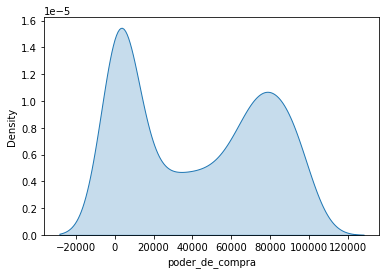

In [50]:
plot_density_type("front-end", type10_df[type10_df["poder_de_compra"] < 100000])

/tmp/ipykernel_2478/3541173781.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(aaa_df["poder_de_compra"], shade=True)


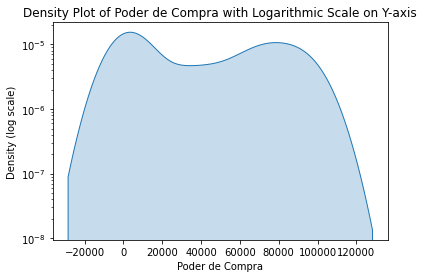

In [51]:
plot_log_density_type("front-end", type10_df[type10_df["poder_de_compra"] < 100000])